Task 3: Neural Network from Scratch

Data Preprocessing and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

df_dia = pd.read_csv(r'.\data\diabetes.csv')

cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df_dia[col] = df_dia[col].replace(0, df_dia[col].median())

X = df_dia.drop('Outcome', axis=1).values
y = df_dia['Outcome'].values.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

 The Mathematical Engine
 
 used Xavier Initialization to keep signal variance consistent.
  Forward Pass: 
  Maps inputs to a prediction via $z = XW + b$ and the Sigmoid activation.
  Backward Pass: 
  Use the Chain Rule to compute gradients  and updates weights via Gradient Descent.

In [2]:
class NeuralNetworkFromScratch:
    def __init__(self, input_size, hidden_size, output_size, lr=0.1):
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1. / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1. / hidden_size)
        self.b2 = np.zeros((1, output_size))
        self.lr = lr
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = y.shape[0]
        dz2 = output - y #err
        
        dW2 = np.dot(self.a1.T, dz2) / m # Loss w.r.t W2 = err X current l is fn of z
        db2 = np.sum(dz2, axis=0, keepdims=True) / m # sum of error for bias
        
        dz1 = np.dot(dz2, self.W2.T) * (self.a1 * (1 - self.a1)) # direction and magnitude to change weights
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=3000):
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = -np.mean(y * np.log(output + 1e-8) + (1 - y) * np.log(1 - output + 1e-8))
            self.loss_history.append(loss)

Model Evaluation and Comparison

train and compare it against sklearn's MLP to validate our scratch implementation.

Scratch Accuracy: 0.7468
Sklearn Accuracy: 0.7338


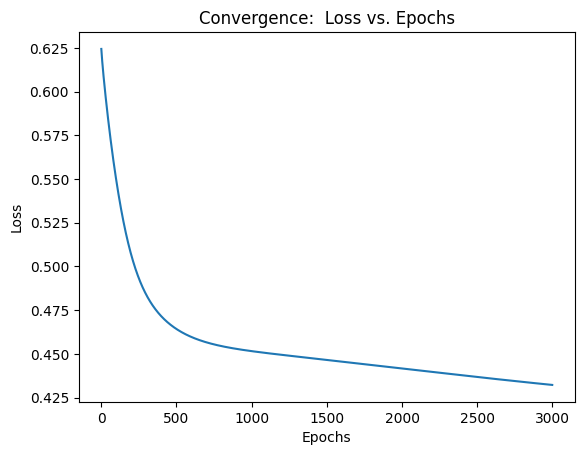

In [3]:
nn = NeuralNetworkFromScratch(input_size=8, hidden_size=12, output_size=1)
nn.train(X_train, y_train, epochs=3000)

mlp = MLPClassifier(hidden_layer_sizes=(12,), activation='logistic', solver='sgd', 
                    learning_rate_init=0.1, max_iter=3000, random_state=42)
mlp.fit(X_train, y_train.ravel())

scratch_acc = accuracy_score(y_test, (nn.forward(X_test) > 0.5))
sklearn_acc = accuracy_score(y_test, mlp.predict(X_test))

print(f"Scratch Accuracy: {scratch_acc:.4f}")
print(f"Sklearn Accuracy: {sklearn_acc:.4f}")

plt.plot(nn.loss_history)
plt.title("Convergence:  Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()